<H1><B>KMEANS CLUSTERING</B></H1>


dependencies

python///tensorflow///numpy///matplotlib///scikit-learn

In [30]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

taking 1500 samples

2 feautures and 3 clusters

make_blobs returns to X,y(the data points, the labels)

In [31]:
n_samples = 1500
n_features = 2
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, 
                  n_features=n_features, 
                  centers=n_clusters, 
                  random_state=42)

standard mean scaling

In [32]:
X = (X- X.mean(axis=0))/X.std(axis=0)

taking 3 centroids

100 epochs(iterations)

with a learning rate of 0.01
(learning rate = how much more u want the descend to happen)

In [33]:
k = 3
epochs = 100
learning_rate = 0.01

taking on random centriods in a tensor variable with 2d array since 2 features

In [34]:
centroids = tf.Variable(np.random.randn(k, n_features), dtype=tf.float32)

In [35]:
centroids

<tf.Variable 'Variable:0' shape=(3, 2) dtype=float32, numpy=
array([[ 0.5171062, -0.5777124],
       [-0.3894489,  1.0912204],
       [-0.7623014,  0.6618429]], dtype=float32)>

assiging the clusters by kmeans clustering

converting the data set of data points to a tensor of uniform points (optional)

calculating the distances of each data point from the centriods by (distance - centroid)
<p>distance = √((x<sub>1</sub> - c<sub>1</sub>)<sup>2</sup> + (x<sub>2</sub> - c<sub>2</sub>)<sup>2</sup>)</p>


returning the minimum tensor value 

In [36]:
def assign_clusters(X, centroids):
    X = tf.convert_to_tensor(X, dtype=tf.float32)
    distances = tf.norm(tf.expand_dims(X, 1)- centroids, axis=2)
    return tf.argmin(distances, axis=1)

minimize the sum of squared distances (or any other distance metric) between each data point and its assigned centroid

In [37]:
optimizer = tf.optimizers.Adam(learning_rate)

Epoch Loop: For each epoch (iteration), the following happens:

Gradient Tape: Tracks the operations to compute gradients for optimizing the centroids.

Cluster Assignment: Assigns each data point to the nearest centroid.

Loss Calculation: Computes the total loss, which is the sum of squared distances between the centroids and the data points.
<p>loss = Σ (x<sub>i</sub> - c<sub>k<sub>i</sub></sub>)<sup>2</sup></p>


Gradient Calculation: Gradients of the loss with respect to the centroids are computed.

Optimizer Step: The optimizer (Adam) adjusts the centroids based on the gradients to minimize the loss.

Print Loss: Every 10 epochs, or at the last epoch, the loss is printed to monitor the optimization progress.

In [38]:
for epoch in range(epochs):
    with tf.GradientTape() as tape:
        cluster_assignments = assign_clusters(X, centroids)
        loss = tf.reduce_sum(tf.square(tf.gather(centroids, cluster_assignments) - X))

    gradients = tape.gradient(loss, [centroids])
    optimizer.apply_gradients(zip(gradients, [centroids]))

    if epoch % 10 == 0 or epoch == epoch-1:
        print(f"Epoch {epoch+1}, Loss: {loss.numpy()}")
    

Epoch 1, Loss: 2143.19873046875
Epoch 11, Loss: 623.2590942382812
Epoch 21, Loss: 296.6812744140625
Epoch 31, Loss: 134.91131591796875
Epoch 41, Loss: 121.53700256347656
Epoch 51, Loss: 102.58480834960938
Epoch 61, Loss: 96.86247253417969
Epoch 71, Loss: 95.48162078857422
Epoch 81, Loss: 94.92786407470703
Epoch 91, Loss: 94.4335708618164


<b>visualization</b>

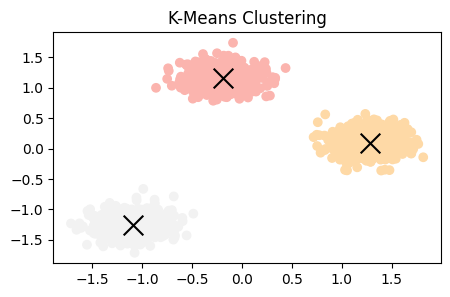

In [48]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Pastel1')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200)
plt.title('K-Means Clustering')
plt.show()


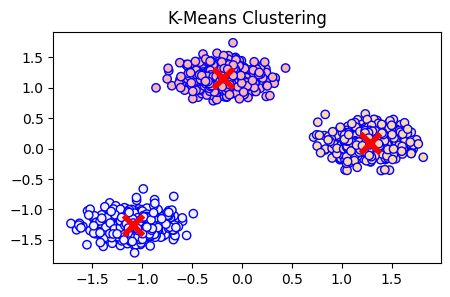

In [60]:
fig = plt.figure(figsize=(5,3))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Pastel1',edgecolors='b')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='x', s=200, linewidths=4)
plt.title('K-Means Clustering')
plt.show()


<BR>
Initially, centroids are randomly assigned.
<BR>Over time, they adjust based on minimizing the sum of squared distances to assigned points.<br>
After training, the centroids stabilize, and points are assigned to their closest cluster.
